## Evaluate

https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/

In [38]:
import os
import numpy as np
import pandas as pd
import sklearn.decomposition
import matplotlib.pyplot as plt

!pip3 install --user --upgrade --quiet gensim
import gensim
import gensim.models

In [9]:
model = gensim.models.Word2Vec.load(os.path.expanduser("~/data/variante2vec/20190911-191408.model"))

In [25]:
with open("hugo", "r") as fd:
    hugo = fd.read().lower().splitlines() 
    
genes = set(model.wv.vocab).intersection(set(hugo))

In [55]:
# Load COSMIC Cancer Genes (https://cancer.sanger.ac.uk/census)
cosmic_genes = list(pd.read_csv(os.path.expanduser("~/data/cosmic.tsv"), sep="\t")["Gene Symbol"].values)
print(len(cosmic_genes))
cosmic_genes = [gene.lower() for gene in cosmic_genes if gene.lower() in set(model.wv.vocab)]
print(len(cosmic_genes))

723
643


In [10]:
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = sklearn.decomposition.PCA(n_components=2)
result = pca.fit_transform(X)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


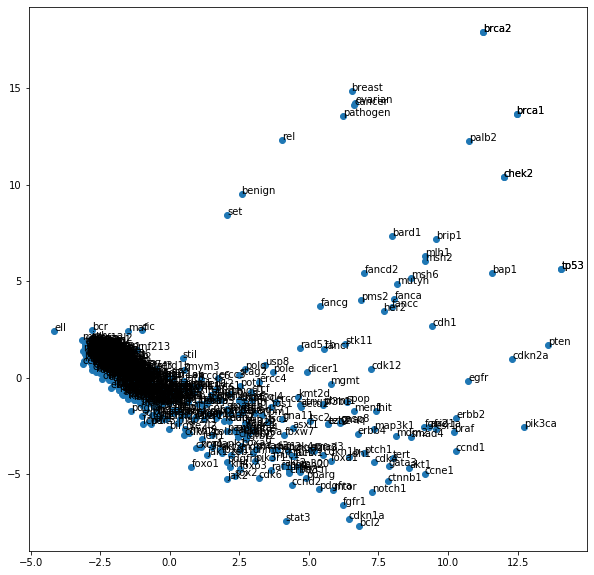

In [56]:
words = list(model.wv.vocab)

targets = []

targets = ["brca1", "brca2", "tp53", "her2", "chek2", "breast", "cancer", "ovarian", "pathogen", "benign"]

# targets = targets + [w for w in list(model.wv.vocab) if w.startswith("c.") and len(w) > 5]

# targets += [gene for gene in cosmic_genes if gene in list(model.wv.vocab)]
targets += cosmic_genes

# targets += genes

indexes = [words.index(w) for w in targets]

pca = sklearn.decomposition.PCA(n_components=2)
result = pca.fit_transform(X[indexes])

# create a scatter plot of the projection
plt.figure(figsize=(10,10))
plt.scatter(result[:, 0], result[:, 1])
# words = list(model.wv.vocab)

for i, word in enumerate(targets):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()